In [ ]:
# Install the Kaggle library
!pip install -q kaggle

# Create a directory for Kaggle and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d angelchi56/abnormal-highdensity-crowds

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/angelchi56/abnormal-highdensity-crowds
License(s): DbCL-1.0
100% 9.87G/9.88G [02:40<00:00, 46.8MB/s]
100% 9.88G/9.88G [02:40<00:00, 66.2MB/s]


In [ ]:
# Unzip the dataset
import zipfile
import os

# Unzip dataset
with zipfile.ZipFile('abnormal-highdensity-crowds.zip', 'r') as zip_ref:
    zip_ref.extractall('abnormal-highdensity-crowds')

In [ ]:
from collections import Counter
# Function to count file types
def count_file_types(files):
    counter = Counter()
    for file in files:
        ext = os.path.splitext(file)[1]
        counter[ext] += 1
    return counter

# Print folder map with file counts
for root, dirs, files in os.walk('UCSD_Anomaly_Dataset.v1p2'):
    level = root.replace(os.path.commonpath(['UCSD_Anomaly_Dataset.v1p2']), '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    if files:
        file_counts = count_file_types(files)
        subindent = ' ' * 4 * (level + 1)
        for ext, count in file_counts.items():
            print(f"{subindent}{count} files with '{ext}' extension")

UCSD_Anomaly_Dataset.v1p2/
    2 files with '.txt' extension
    1 files with '' extension
    1 files with '.txt~' extension
    UCSDped1/
        1 files with '' extension
        Train/
            1 files with '.DS_Store' extension
            1 files with '' extension
            Train009/
                200 files with '.tif' extension
            Train026/
                200 files with '.tif' extension
            Train021/
                200 files with '.tif' extension
            Train015/
                200 files with '.tif' extension
            Train003/
                200 files with '.tif' extension
            Train019/
                200 files with '.tif' extension
            Train010/
                200 files with '.tif' extension
            Train020/
                200 files with '.tif' extension
            Train032/
                200 files with '.tif' extension
            Train008/
                200 files with '.tif' extension
            Train004/
    

In [ ]:
# Import necessary libraries
import numpy as np
import cv2
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, TimeDistributed, LSTM
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

# Function to load frames from a video
def extract_frames(video_path, frames_per_video=16):
    cap = cv2.VideoCapture(video_path)
    frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (224, 224))  # Resize frame if needed
        frames.append(frame)
        if len(frames) == frames_per_video:
            yield np.array(frames)  # Yield batch of frames
            frames = []
    cap.release()

# Function to build anomaly detection model
def build_model(input_shape):
    model = Sequential([
        TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape),
        TimeDistributed(MaxPooling2D((2, 2))),
        TimeDistributed(Flatten()),
        LSTM(32),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Example usage
video_path = '/content/abnormal-highdensity-crowds/Abnormal High-density Crowds/4_Italy/View_1/Test/Footage.mp4'
frames_per_video = 16

# Load frames from video
frame_generator = extract_frames(video_path, frames_per_video)
frames = [frame for frame in frame_generator]

# Assuming you have labels (0 for normal, 1 for anomaly) for each video
# Example: if all frames in this example video are normal
labels = np.zeros(len(frames))  # All frames labeled as normal (0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(frames, labels, test_size=0.2, random_state=42)

# Prepare input shape for the model
input_shape = (frames_per_video, 224, 224, 3)  # Adjust frame size if needed

# Build and train the model
model = build_model(input_shape)
model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test), np.array(y_test)))

# Evaluate the model
loss, accuracy = model.evaluate(np.array(X_test), np.array(y_test))
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Save the model
model.save('/path/to/save/model.h5')

Epoch 1/10
2/2 [==============================] - 11s 1s/step - loss: 0.7089 - accuracy: 0.5588 - val_loss: 0.1580 - val_accuracy: 1.0000
Epoch 2/10
2/2 [==============================] - 0s 108ms/step - loss: 0.1626 - accuracy: 1.0000 - val_loss: 0.1246 - val_accuracy: 1.0000
Epoch 3/10
2/2 [==============================] - 0s 106ms/step - loss: 0.1245 - accuracy: 1.0000 - val_loss: 0.1223 - val_accuracy: 1.0000
Epoch 4/10
2/2 [==============================] - 0s 133ms/step - loss: 0.1223 - accuracy: 1.0000 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 5/10
2/2 [==============================] - 0s 160ms/step - loss: 0.1200 - accuracy: 1.0000 - val_loss: 0.1178 - val_accuracy: 1.0000
Epoch 6/10
2/2 [==============================] - 0s 106ms/step - loss: 0.1178 - accuracy: 1.0000 - val_loss: 0.1156 - val_accuracy: 1.0000
Epoch 7/10
2/2 [==============================] - 0s 184ms/step - loss: 0.1156 - accuracy: 1.0000 - val_loss: 0.1134 - val_accuracy: 1.0000
Epoch 8/10
2/2 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


##UCSD

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install necessary packages
!pip install opencv-python-headless tensorflow moviepy -q

In [ ]:
# Step 1: Download the UCSD Anomaly Detection Dataset
!wget http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
!tar -xzf UCSD_Anomaly_Dataset.tar.gz

--2024-07-11 06:39:27--  http://www.svcl.ucsd.edu/projects/anomaly/UCSD_Anomaly_Dataset.tar.gz
Resolving www.svcl.ucsd.edu (www.svcl.ucsd.edu)... 169.228.63.130
Connecting to www.svcl.ucsd.edu (www.svcl.ucsd.edu)|169.228.63.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 740306953 (706M) [application/x-gzip]
Saving to: ‘UCSD_Anomaly_Dataset.tar.gz’

UCSD_Anomaly_Datase 100%[===================>] 706.01M  96.7MB/s    in 13s     

2024-07-11 06:39:40 (53.1 MB/s) - ‘UCSD_Anomaly_Dataset.tar.gz’ saved [740306953/740306953]



In [ ]:
# Step 2: Preprocess the dataset using a generator
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

def extract_frames_from_images(image_paths, frame_height=240, frame_width=360):
    frames = []
    for img_path in image_paths:
        frame = cv2.imread(img_path)
        frame = cv2.resize(frame, (frame_width, frame_height))
        frames.append(frame)
    return frames

def data_generator(video_paths, seq_length=10, batch_size=32):
    while True:
        X_batch = []
        y_batch = []
        for video_path in video_paths:
            if os.path.isdir(video_path):
                image_files = sorted(os.listdir(video_path))
                image_paths = [os.path.join(video_path, img) for img in image_files if img.endswith('.tif')]
                frames = extract_frames_from_images(image_paths)
                for i in range(0, len(frames) - seq_length, seq_length):
                    X_batch.append(frames[i:i+seq_length])
                    if 'Train' in video_path:
                        y_batch.append(0)
                    elif 'Test' in video_path:
                        y_batch.append(1)

                    if len(X_batch) == batch_size:
                        X_array = np.array(X_batch)
                        y_array = to_categorical(np.array(y_batch), num_classes=2)
                        yield X_array, y_array
                        X_batch = []
                        y_batch = []

# Define paths
normal_videos_path = 'UCSD_Anomaly_Dataset.v1p2/UCSDped1/Train'
abnormal_videos_path = 'UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test'

# Calculate dataset sizes
normal_videos = [os.path.join(normal_videos_path, video) for video in sorted(os.listdir(normal_videos_path))]
abnormal_videos = [os.path.join(abnormal_videos_path, video) for video in sorted(os.listdir(abnormal_videos_path))]
total_samples = len(normal_videos) + len(abnormal_videos)
print(f"Total samples: {total_samples}")

# Step 3: Build and train the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, TimeDistributed

input_shape = (10, 240, 360, 3)  # Adjusted to (sequence_length, height, width, channels)

model = Sequential([
    TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=input_shape),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(32, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Conv2D(64, (3, 3), activation='relu')),
    TimeDistributed(MaxPooling2D((2, 2))),
    TimeDistributed(Flatten()),
    LSTM(50),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

batch_size = 32
train_generator = data_generator(normal_videos, seq_length=10, batch_size=batch_size)
test_generator = data_generator(abnormal_videos, seq_length=10, batch_size=batch_size)

steps_per_epoch = len(normal_videos) // batch_size
validation_steps = len(abnormal_videos) // batch_size

model.fit(train_generator, epochs=10, steps_per_epoch=steps_per_epoch,
          validation_data=test_generator, validation_steps=validation_steps)

# Step 4: Save the model to Google Drive
model_path = '/content/drive/My Drive/chaos_detection_model.h5'
model.save(model_path)
print(f"Model saved to {model_path}")

Total samples: 86
Epoch 1/10
1/1 [==============================] - 43s 43s/step - loss: 0.3777 - accuracy: 1.0000 - val_loss: 3.5589 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 36s 36s/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 3.6540 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 38s 38s/step - loss: 0.0262 - accuracy: 1.0000 - val_loss: 4.0659 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 37s 37s/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 4.1440 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 38s 38s/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 4.2991 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 47s 47s/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 4.3208 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 36s 36s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 4.3571 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/My Drive/chaos_detection_model.h5


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab import files

# Load the model from Google Drive or local path
model_path = '/content/drive/My Drive/chaos_detection_model.h5'
model = load_model(model_path)
print(f"Model loaded from {model_path}")

# Function to preprocess each frame
def preprocess_frame(frame):
    frame = cv2.resize(frame, (360, 240))
    frame = frame / 255.0
    return frame

# Function to predict chaos in a sequence of frames
def predict_chaos(frames, model):
    frames = np.array([preprocess_frame(frame) for frame in frames])
    frames = np.expand_dims(frames, axis=0)
    prediction = model.predict(frames)
    confidence_score = prediction[0][1]  # Adjust based on your model's output
    is_chaotic = confidence_score > 0.5  # Threshold for chaos
    return is_chaotic, confidence_score

# Function to process video and label chaos
def process_video(input_path, output_path, model, seq_length=10):
    video = cv2.VideoCapture(input_path)

    # Check if the video opened successfully
    if not video.isOpened():
        print(f"Error: Could not open video {input_path}")
        return

    fps = video.get(cv2.CAP_PROP_FPS) or 20.0  # Use video FPS if available, otherwise default to 20
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
    print(f"Video FPS: {fps}, Width: {width}, Height: {height}")

    # Use 'mp4v' codec for MP4 format
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (360, 240))

    frames = []
    while video.isOpened():
        ret, frame = video.read()
        if not ret:
            break
        frames.append(frame)
        if len(frames) == seq_length:
            is_chaotic, confidence_score = predict_chaos(frames, model)
            label = f'Chaotic: {is_chaotic}, Confidence: {confidence_score:.2f}'
            for f in frames:
                annotated_frame = f.copy()
                cv2.putText(annotated_frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1,
                            (0, 255, 0) if is_chaotic else (255, 0, 0), 2)
                out.write(annotated_frame)
            frames = frames[1:]  # Slide the window

    video.release()
    out.release()
    cv2.destroyAllWindows()
    print(f"Processed video saved at: {output_path}")

# Example path to a video in the UCSD dataset (you can change this path as needed)
input_video_path = '/content/UCSD_Anomaly_Dataset.v1p2/UCSDped1/Test/Test001/002.tif'

# Output video path
output_video_path = '/content/output_video.mp4'

# Process the video
process_video(input_video_path, output_video_path, model)

# Download the output video
files.download(output_video_path)
print(f"Processed video saved at: {output_video_path}")

##My Dataset

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, LSTM, Dense, Flatten

# Constants
dataset_path = '/content/drive/MyDrive/Normal and Abnormal'  # Update with your dataset path
img_height, img_width = 64, 64  # Update with your desired frame dimensions
num_frames_per_video = 20  # Number of frames to sample per video
batch_size = 16
epochs = 20

# Function to load and preprocess video frames
def load_video_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    while len(frames) < num_frames_per_video:
        ret, frame = cap.read()
        if not ret:
            break
        frame = cv2.resize(frame, (img_width, img_height))
        frames.append(frame)
    cap.release()
    return np.array(frames)

# Load dataset and preprocess
abnormal_videos = os.listdir(os.path.join(dataset_path, 'Abnormal'))
normal_videos = os.listdir(os.path.join(dataset_path, 'Normal'))

X = []
y = []

# Load abnormal videos
for video in abnormal_videos:
    video_frames = load_video_frames(os.path.join(dataset_path, 'Abnormal', video))  # Corrected path
    if len(video_frames) == num_frames_per_video:
        X.append(video_frames)
        y.append(1)  # Label for abnormal

# Load normal videos
for video in normal_videos:
    video_frames = load_video_frames(os.path.join(dataset_path, 'Normal', video))  # Corrected path
    if len(video_frames) == num_frames_per_video:
        X.append(video_frames)
        y.append(0)  # Label for normal

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and validation sets
if len(X) > 0:  # Check if there are samples in the dataset
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define CNN-LSTM model
    model = Sequential()
    model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu'), input_shape=(num_frames_per_video, img_height, img_width, 3)))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=batch_size, epochs=epochs)

    # Save the model
    model.save('/content/drive/MyDrive/Normal_Abnormal_model.h5')  # Update with your model save path
else:
    print("No valid samples found in the dataset.")

Epoch 1/20
2/2 [==============================] - 9s 3s/step - loss: 0.6422 - accuracy: 0.5238 - val_loss: 0.4505 - val_accuracy: 0.8333
Epoch 2/20
2/2 [==============================] - 3s 2s/step - loss: 0.6290 - accuracy: 0.7143 - val_loss: 0.4547 - val_accuracy: 0.8333
Epoch 3/20
2/2 [==============================] - 4s 2s/step - loss: 0.6754 - accuracy: 0.7143 - val_loss: 0.4543 - val_accuracy: 0.8333
Epoch 4/20
2/2 [==============================] - 4s 2s/step - loss: 0.6729 - accuracy: 0.7143 - val_loss: 0.4537 - val_accuracy: 0.8333
Epoch 5/20
2/2 [==============================] - 5s 2s/step - loss: 0.6703 - accuracy: 0.7143 - val_loss: 0.4531 - val_accuracy: 0.8333
Epoch 6/20
2/2 [==============================] - 3s 2s/step - loss: 0.6670 - accuracy: 0.7143 - val_loss: 0.4525 - val_accuracy: 0.8333
Epoch 7/20
2/2 [==============================] - 3s 2s/step - loss: 0.6626 - accuracy: 0.7143 - val_loss: 0.4520 - val_accuracy: 0.8333
Epoch 8/20
2/2 [=========================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import os
import cv2
import numpy as np
from keras.models import load_model
from google.colab import files

# Constants
model_path = '/content/drive/MyDrive/Normal_Abnormal_model.h5'  # Path to your trained model
video_path = '/content/1046171221-preview.mp4'  # Path to your video file
output_path = '/content/labeled_video.mp4'  # Output video path with labels

img_height, img_width = 64, 64  # Dimensions expected by the model
num_frames_per_video = 20  # Number of frames to sample per video
confidence_threshold = 0.5  # Threshold to classify as Abnormal

# Load the trained model
model = load_model(model_path)

# Function to extract and preprocess frames from video
def extract_and_preprocess_frames(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_indices = np.linspace(0, total_frames - 1, num=num_frames_per_video, dtype=int)

    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame = cv2.resize(frame, (img_width, img_height))
            frames.append(frame)
    cap.release()

    # If fewer frames than required, pad with copies of the last frame
    while len(frames) < num_frames_per_video:
        frames.append(frames[-1])

    frames = np.array(frames)
    frames = frames.astype('float32') / 255.0  # Normalize pixel values
    frames = np.expand_dims(frames, axis=0)  # Add batch dimension
    return frames

# Function to predict using the model
def predict_video(frames):
    predictions = model.predict(frames)
    average_prediction = np.mean(predictions)  # Aggregate predictions (mean, max, etc.)
    confidence_score = average_prediction.item()
    label = "Abnormal" if confidence_score >= confidence_threshold else "Normal"
    return label, confidence_score

# Process video
frames = extract_and_preprocess_frames(video_path)
label, confidence_score = predict_video(frames)

# Print label and confidence score
print(f"Video is {label} with confidence score: {confidence_score}")

# Determine text color based on label
if label == "Abnormal":
    text_color = (0, 0, 255)  # Red color for "Abnormal"
else:
    text_color = (0, 255, 0)  # Green color for "Normal"

# Write label and confidence score on the video frames
cap = cv2.VideoCapture(video_path)
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (640, 480))  # Update resolution as needed
font = cv2.FONT_HERSHEY_SIMPLEX
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*'mp4v'), 30, (frame_width, frame_height))

while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.putText(frame, f'{label} ({confidence_score:.2f})', (50, 50), font, 1, text_color, 2, cv2.LINE_AA)
    out.write(frame)
cap.release()
out.release()

# Trigger download of the processed video
files.download(output_path)

1/1 [==============================] - 1s 666ms/step
Video is Abnormal with confidence score: 0.8019201159477234


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Heatmap

In [ ]:
!pip install opencv-python numpy -q

# Step 3: Download YOLOv3 weights and configuration files
!wget https://pjreddie.com/media/files/yolov3.weights -q
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg -q
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names -q

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

# Load YOLOv3 model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to process video and generate heatmap
def process_video(input_video_path, output_video_path):
    cap = cv2.VideoCapture(input_video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    # Make sure 'out' is used consistently for the VideoWriter object
    video_out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    heatmap = np.zeros((height, width), np.float32)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # ... (Your object detection and heatmap generation logic)

        # Create overlay (replace with your actual overlay creation logic)
        overlay = frame.copy() # Example: Just copying the original frame for now

        # Write to the video file using the VideoWriter object
        video_out.write(overlay)

    cap.release()
    video_out.release() # Release the VideoWriter
    print(f"Processed video saved at {output_video_path}")

# Example usage
input_video_path = 'Abnormal (14).mp4'
output_video_path = 'output_video.mp4'
process_video(input_video_path, output_video_path)

# Download the video
files.download(output_video_path)

Processed video saved at output_video.mp4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##UCF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install opencv-python opencv-python-headless numpy scikit-learn joblib -q

In [ ]:
!unzip /content/drive/MyDrive/Normal_Abnormal_Crowd.zip -d /content/dataset/

Archive:  /content/drive/MyDrive/Normal_Abnormal_Crowd.zip
   creating: /content/dataset/Normal Crowds/
  inflating: /content/dataset/Normal Crowds/341-46_l.mov  
  inflating: /content/dataset/Normal Crowds/3687-18_70.mov  
  inflating: /content/dataset/Normal Crowds/637-147_l.mov  
  inflating: /content/dataset/Normal Crowds/688-10_l.mov  
  inflating: /content/dataset/Normal Crowds/81872953_l.mov  
  inflating: /content/dataset/Normal Crowds/821-10_l.mov  
  inflating: /content/dataset/Normal Crowds/879-38_l.mov  
  inflating: /content/dataset/Normal Crowds/9019-13_l.mov  
  inflating: /content/dataset/Normal Crowds/906-17_l.mov  
  inflating: /content/dataset/Normal Crowds/CRW116.mov  
  inflating: /content/dataset/Normal Crowds/sfw20110024_l.mov  
  inflating: /content/dataset/Normal Crowds/shibuya1.mov  
   creating: /content/dataset/Abnormal Crowds/
  inflating: /content/dataset/Abnormal Crowds/1183-88_l.mov  
  inflating: /content/dataset/Abnormal Crowds/2010-291_l.avi  
  infla

In [ ]:
import cv2
import numpy as np
import os
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Define the fixed length for feature vectors
FIXED_LENGTH = 1000  # Adjust this value based on your requirements

# Step 4: Define functions to compute optical flow, social forces, and extract features

def compute_optical_flow(video_path):
    cap = cv2.VideoCapture(video_path)
    ret, frame1 = cap.read()
    if not ret:
        print(f"Error: Could not read the first frame from {video_path}")
        return None

    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    flow_list = []
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Computing optical flow for {video_path}...")

    while(cap.isOpened()):
        ret, frame2 = cap.read()
        if not ret:
            break
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        flow_list.append(flow)
        prvs = next

        frame_count += 1
        if frame_count % 50 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")

    cap.release()
    print(f"Optical flow computation completed for {video_path}")
    return flow_list

def compute_social_force(flow_list):
    h, w = flow_list[0].shape[:2]
    force_matrix = np.zeros((h, w, 2))
    print("Computing social forces...")

    for idx, flow in enumerate(flow_list):
        force_matrix[:, :, 0] += flow[:, :, 0]
        force_matrix[:, :, 1] += flow[:, :, 1]
        if idx % 50 == 0:
            print(f"Processed {idx+1}/{len(flow_list)} flows...")

    print("Social forces computation completed.")
    return np.sqrt(np.sum(np.square(force_matrix), axis=2))

def extract_features(video_path):
    flow_list = compute_optical_flow(video_path)
    if flow_list is None:
        return None
    social_force_matrix = compute_social_force(flow_list)
    features = social_force_matrix.flatten()

    # Resize or pad the feature vector to the fixed length
    if len(features) > FIXED_LENGTH:
        features = features[:FIXED_LENGTH]
    else:
        features = np.pad(features, (0, FIXED_LENGTH - len(features)), 'constant')

    return features

# Step 5: Extract features from all normal and abnormal videos
normal_videos_path = '/content/dataset/Normal Crowds/'
abnormal_videos_path = '/content/dataset/Abnormal Crowds/'

normal_features = []
print("Extracting features from normal videos...")
for idx, video_file in enumerate(os.listdir(normal_videos_path)):
    if video_file.endswith('.mov') or video_file.endswith('.avi'):
        video_path = os.path.join(normal_videos_path, video_file)
        features = extract_features(video_path)
        if features is not None:
            normal_features.append(features)
            print(f"Processed {idx+1}/{len(os.listdir(normal_videos_path))} videos...")
            print(f"Feature shape: {features.shape}")

abnormal_features = []
print("Extracting features from abnormal videos...")
for idx, video_file in enumerate(os.listdir(abnormal_videos_path)):
    if video_file.endswith('.mov') or video_file.endswith('.avi'):
        video_path = os.path.join(abnormal_videos_path, video_file)
        features = extract_features(video_path)
        if features is not None:
            abnormal_features.append(features)
            print(f"Processed {idx+1}/{len(os.listdir(abnormal_videos_path))} videos...")
            print(f"Feature shape: {features.shape}")

# Step 6: Standardize the features
scaler = StandardScaler()
X_normal = scaler.fit_transform(normal_features)
X_abnormal = scaler.transform(abnormal_features)

# Step 7: Train the OneClassSVM model
print("Training OneClassSVM model...")
svm = OneClassSVM(kernel='rbf', gamma='auto').fit(X_normal)
print("Model training completed.")

# Step 8: Save the trained model and scaler
model_path = '/content/drive/MyDrive/social_force_model_UCF.joblib'
scaler_path = '/content/drive/MyDrive/scaler_UCF.joblib'
dump(svm, model_path)
dump(scaler, scaler_path)

print("Model and scaler saved to Google Drive.")

Extracting features from normal videos...
Computing optical flow for /content/dataset/Normal Crowds/CRW116.mov...
Processed 50/630 frames...
Processed 100/630 frames...
Processed 150/630 frames...
Processed 200/630 frames...
Processed 250/630 frames...
Processed 300/630 frames...
Processed 350/630 frames...
Processed 400/630 frames...
Processed 450/630 frames...
Processed 500/630 frames...
Processed 550/630 frames...
Processed 600/630 frames...
Optical flow computation completed for /content/dataset/Normal Crowds/CRW116.mov
Computing social forces...
Processed 1/629 flows...
Processed 51/629 flows...
Processed 101/629 flows...
Processed 151/629 flows...
Processed 201/629 flows...
Processed 251/629 flows...
Processed 301/629 flows...
Processed 351/629 flows...
Processed 401/629 flows...
Processed 451/629 flows...
Processed 501/629 flows...
Processed 551/629 flows...
Processed 601/629 flows...
Social forces computation completed.
Processed 1/12 videos...
Feature shape: (1000,)
Computing 

Computing optical flow for /content/Abnormal (4).mp4...
Processed 50/641 frames...
Processed 100/641 frames...
Processed 150/641 frames...
Processed 200/641 frames...
Processed 250/641 frames...
Processed 300/641 frames...
Processed 350/641 frames...
Processed 400/641 frames...
Processed 450/641 frames...
Processed 500/641 frames...
Processed 550/641 frames...
Processed 600/641 frames...
Optical flow computation completed for /content/Abnormal (4).mp4
Processed 50/641 frames...
Processed 100/641 frames...
Processed 150/641 frames...
Processed 200/641 frames...
Processed 250/641 frames...
Processed 300/641 frames...
Processed 350/641 frames...
Processed 400/641 frames...
Processed 450/641 frames...
Processed 500/641 frames...
Processed 550/641 frames...
Processed 600/641 frames...
Video processing completed. Output saved to /content/processed_video.avi


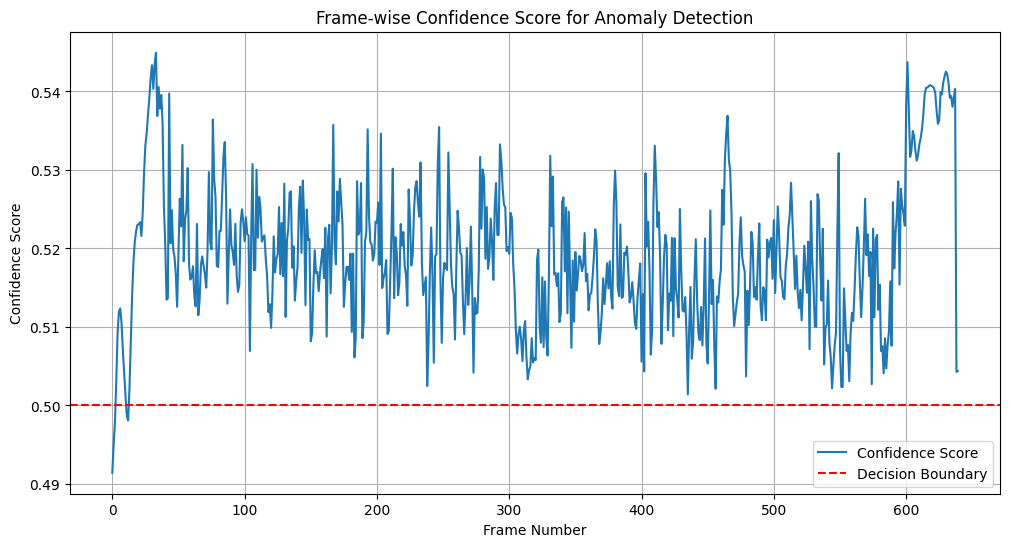

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from joblib import load
import os
import matplotlib.pyplot as plt

# Define the fixed length for feature vectors
FIXED_LENGTH = 1000  # Adjust this value based on your requirements

# Step 3: Load the trained model and scaler
model_path = '/content/drive/MyDrive/social_force_model_UCF.joblib'
scaler_path = '/content/drive/MyDrive/scaler_UCF.joblib'
svm = load(model_path)
scaler = load(scaler_path)

# Step 4: Define functions to compute optical flow, social forces, and extract features

def compute_optical_flow(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {video_path}")
        return None

    ret, frame1 = cap.read()
    if not ret:
        print(f"Error: Failed to read the first frame from {video_path}")
        cap.release()
        return None

    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    flow_list = []
    frame_count = 0
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Computing optical flow for {video_path}...")

    while(cap.isOpened()):
        ret, frame2 = cap.read()
        if not ret:
            break
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
        flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        flow_list.append(flow)
        prvs = next

        frame_count += 1
        if frame_count % 50 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")

    cap.release()
    print(f"Optical flow computation completed for {video_path}")
    return flow_list

def compute_social_force(flow_list):
    h, w = flow_list[0].shape[:2]
    force_matrix = np.zeros((h, w, 2))
    print("Computing social forces...")

    for idx, flow in enumerate(flow_list):
        force_matrix[:, :, 0] += flow[:, :, 0]
        force_matrix[:, :, 1] += flow[:, :, 1]
        if idx % 50 == 0:
            print(f"Processed {idx+1}/{len(flow_list)} flows...")

    print("Social forces computation completed.")
    return np.sqrt(np.sum(np.square(force_matrix), axis=2))

def extract_features(frame, prvs):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prvs, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    h, w = flow.shape[:2]
    force_matrix = np.zeros((h, w, 2))

    force_matrix[:, :, 0] += flow[:, :, 0]
    force_matrix[:, :, 1] += flow[:, :, 1]

    features = np.sqrt(np.sum(np.square(force_matrix), axis=2)).flatten()

    # Resize or pad the feature vector to the fixed length
    if len(features) > FIXED_LENGTH:
        features = features[:FIXED_LENGTH]
    else:
        features = np.pad(features, (0, FIXED_LENGTH - len(features)), 'constant')

    return features

# Logistic function to convert decision scores to probabilities
def logistic_function(x):
    return 1 / (1 + np.exp(-x))

# Step 5: Function to process the video and label anomalies
def process_video(input_video_path, output_video_path):
    if not os.path.exists(input_video_path):
        print(f"Error: Video file {input_video_path} does not exist.")
        return

    cap = cv2.VideoCapture(input_video_path)
    if not cap.isOpened():
        print(f"Error: Could not open video file {input_video_path}")
        return

    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

    frame_count = 0
    flow_list = compute_optical_flow(input_video_path)
    if flow_list is None:
        print(f"Error: Failed to compute optical flow for {input_video_path}")
        return

    ret, frame = cap.read()
    if ret:
        prvs = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    else:
        print(f"Error: Could not read the first frame from {input_video_path}")
        cap.release()
        return

    frame_numbers = []
    confidence_scores = []

    while(cap.isOpened()):
        ret, frame = cap.read()
        if not ret:
            break

        # Extract features from the current frame
        features = extract_features(frame, prvs)
        features = scaler.transform([features])

        # Predict using the trained model
        prediction = svm.predict(features)
        decision_score = svm.decision_function(features)[0]
        confidence_score = logistic_function(decision_score)  # Convert to range 0 to 1

        # Record frame number and confidence score
        frame_numbers.append(frame_count)
        confidence_scores.append(confidence_score)

        # Determine the label and color
        if confidence_score > 0.5:
            # label = f"Anomaly: {confidence_score:.2f}"
            label = f"Anomaly"
            color = (0, 0, 255)  # Red
        else:
            # label = f"Normal: {confidence_score:.2f}"
            label = f"Normal"
            color = (0, 255, 0)  # Green

        # Put the label on the frame
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2, cv2.LINE_AA)

        # Write the frame into the output video
        out.write(frame)

        frame_count += 1
        if frame_count % 50 == 0:
            print(f"Processed {frame_count}/{total_frames} frames...")

    cap.release()
    out.release()
    print(f"Video processing completed. Output saved to {output_video_path}")

    # Plot the confidence scores
    plt.figure(figsize=(12, 6))
    plt.plot(frame_numbers, confidence_scores, label="Confidence Score")
    plt.axhline(y=0.5, color='r', linestyle='--', label="Decision Boundary")
    plt.xlabel("Frame Number")
    plt.ylabel("Confidence Score")
    plt.title("Frame-wise Confidence Score for Anomaly Detection")
    plt.legend()
    plt.grid(True)
    plt.show()

# Step 6: Process a video and label anomalies
input_video_path = '/content/Abnormal (4).mp4'
output_video_path = '/content/processed_video.avi'
process_video(input_video_path, output_video_path)

# Step 7: Download the processed video
from google.colab import files
files.download(output_video_path)